## Homework 3

### Simple Linear Regression

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(palette='Set2')

**Use the sm.OLS() (or any available linear regression) function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Print the model results.**

In [87]:
df = pd.read_csv('data/Auto.csv')
print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB
None


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [88]:
# set up data
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
y = df['mpg']
X = df[['horsepower']]
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=82)

In [89]:
# define and fit model
lm = sm.OLS(y_train, X_train)
lm = lm.fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     414.1
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           1.04e-55
Time:                        11:44:56   Log-Likelihood:                -783.45
No. Observations:                 262   AIC:                             1571.
Df Residuals:                     260   BIC:                             1578.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.3709      0.873     46.246      0.0

In [90]:
# compare real and predicted values for test set
from sklearn import metrics

y_pred = lm.predict(X_test)

# strength of correlation between real and predicted y
print(f"R-squared: {metrics.r2_score(y_test, y_pred):.3f}")
# avg distance from true y
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred):.3f} (mpg)")
# avg % distance
print(f"MAPE: {metrics.mean_absolute_percentage_error(y_test, y_pred)*100:.3f}%")
# weighted avg distance (punishing large errors)
print(f"RMSE: {metrics.root_mean_squared_error(y_test, y_pred):.3f} (mpg)")

R-squared: 0.586
MAE: 3.848 (mpg)
MAPE: 17.912%
RMSE: 5.061 (mpg)


**Comment on the output by answering these questions:**

i.	Is there a relationship between the predictor and the response? Specify the metric you use.

ii.	Is the relationship between the predictor(horsepower) and the response positive or negative?

iii.	How strong is the relationship between the predictor and the response? You should speak in terms of “for every one unit increase in horsepower…” 

iv.	What is the predicted mpg associated with a horsepower of 98? 

v.	What are the associated 95 % confidence interval for the coefficients? 

In [91]:
print(f"i. negative relationship between predictor (horsepower) and response (mpg) as indicated by negative coefficient of predictor, \nthough the correlaton is very weak under a linear model as indicated by the R-squared value")
print(f"ii. negative relationship")
print(f"iii. for every 1-unit increase in horsepower we excect an decrease of {abs(lm.params['horsepower']):.3f} mpg")
print(f"iv. y(98) = {(lm.params['const'] + lm.params['horsepower']*98):.3f} mpg")
print(f"v. intercept CI: ({lm.conf_int().loc['const'][0]:.3f}, {lm.conf_int().loc['const'][1]:.3f}) | "
      f"horsepower CI: ({lm.conf_int().loc['horsepower'][0]:.3f}, {lm.conf_int().loc['horsepower'][1]:.3f})")

i. negative relationship between predictor (horsepower) and response (mpg) as indicated by negative coefficient of predictor, 
though the correlaton is very weak under a linear model as indicated by the R-squared value
ii. negative relationship
iii. for every 1-unit increase in horsepower we excect an decrease of 0.162 mpg
iv. y(98) = 24.455 mpg
v. intercept CI: (38.652, 42.090) | horsepower CI: (-0.178, -0.147)


**Write out the model equation in terms of the coefficients, like y=B0+B1x**

In [92]:
print(f"mpg = {lm.params['const']:.3f} - {abs(lm.params['horsepower']):.3f}(horsepower)")

mpg = 40.371 - 0.162(horsepower)


**Plot the response and the predictor in a new set of axes ax. So the scatterplot of the data, with the corresponding model prediction line on the same graph.**

In [93]:
# combine test data with real and predicted values (for graph functions)
y_test.name = 'mpg_true'
y_pred.name = 'mpg_pred'
compare = pd.concat([X_test, y_test, y_pred], axis=1).drop(['const'], axis=1)
compare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 160 to 151
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   horsepower  130 non-null    int64  
 1   mpg_true    130 non-null    float64
 2   mpg_pred    130 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.1 KB


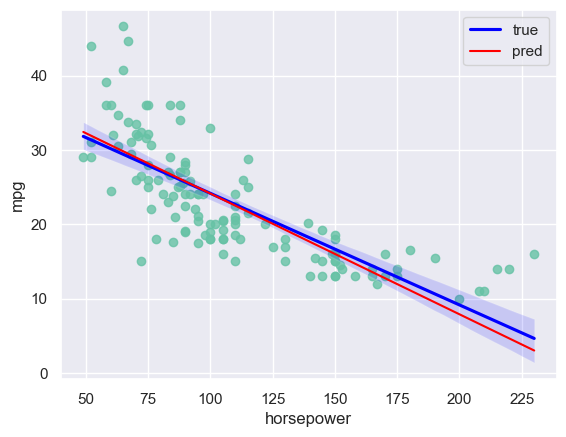

In [94]:
# compare real and predicted lines of best fit for test data
fig, ax = plt.subplots()
sns.regplot(ax=ax, data=compare, x='horsepower', y='mpg_true', line_kws={'color':'blue', 'label':'true'})
sns.lineplot(ax=ax, data=compare, x='horsepower', y='mpg_pred', color='red', label='pred')

ax.set_ylabel('mpg')
ax.legend()
plt.show()

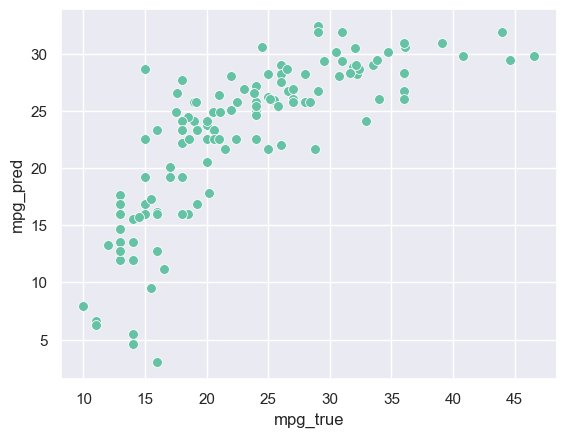

In [95]:
# compare real and predicted y-values (should be linear)
sns.scatterplot(data=compare, x='mpg_true', y='mpg_pred', s=50)
plt.show()

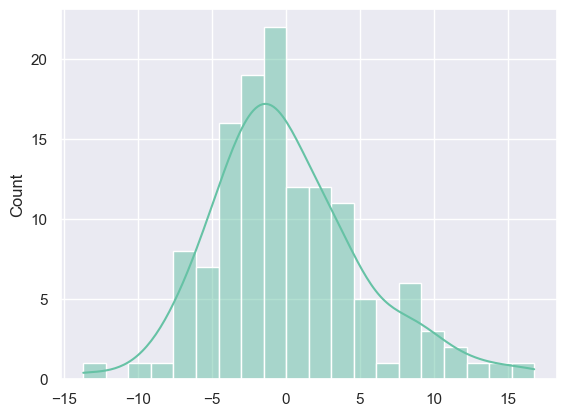

In [96]:
# distribution of residuals (should be normal)
sns.histplot(y_test - y_pred, bins=20, kde=True)
plt.show()

### Multiple Linear Regression

**Use the sm.OLS() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. The origin variable refers to the country of origin and should be treated as a categorical predictor.**

In [97]:
df_dummy = pd.get_dummies(df, columns=['origin'], drop_first=True)
df_dummy.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,False,False
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,False,False
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,False,False


In [98]:
# train/test split
y = df['mpg']
X = df_dummy.drop(['mpg', 'name'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=82)

In [99]:
# scale and add constant
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

In [100]:
pd.DataFrame(X_train_scaled).head(3)

,0,1,2,3,4,5,6,7,8
0,1.0,-0.829498,-1.065670,-0.956795,-1.165475,1.246767,-0.532887,-0.497613,1.962614
1,1.0,1.526367,2.042909,1.262561,2.436638,-0.565555,-0.805575,-0.497613,-0.509525
2,1.0,-0.829498,-0.678308,-0.154618,-0.751711,-0.311830,0.557866,-0.497613,1.962614


In [101]:
pd.DataFrame(X_test_scaled).head(3)

,0,1,2,3,4,5,6,7,8
0,1.0,0.348434,0.667774,0.192992,0.938811,1.246767,-0.260199,-0.497613,-0.509525
1,1.0,0.348434,0.106099,-0.208097,0.259056,0.956796,0.557866,-0.497613,-0.509525
2,1.0,-0.829498,-1.172195,-1.438101,-1.263596,1.428000,-0.805575,2.009592,-0.509525


In [102]:
# define and fit
lm = sm.OLS(y_train, X_train_scaled)
lm = lm.fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     138.7
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           6.01e-88
Time:                        11:44:56   Log-Likelihood:                -687.67
No. Observations:                 262   AIC:                             1393.
Df Residuals:                     253   BIC:                             1425.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.6782      0.210    112.788      0.0

In [103]:
# compare real and predicted values for test set
y_pred = lm.predict(X_test_scaled)

# strength of correlation between real and predicted y
print(f"R-squared: {metrics.r2_score(y_test, y_pred):.3f}")
# avg distance from true y
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred):.3f}")
# avg % distance
print(f"MAPE: {metrics.mean_absolute_percentage_error(y_test, y_pred)*100:.3f}%")
# weighted avg distance (punishing large errors)
print(f"RMSE: {metrics.root_mean_squared_error(y_test, y_pred):.3f}")

R-squared: 0.834
MAE: 2.441
MAPE: 11.512%
RMSE: 3.201


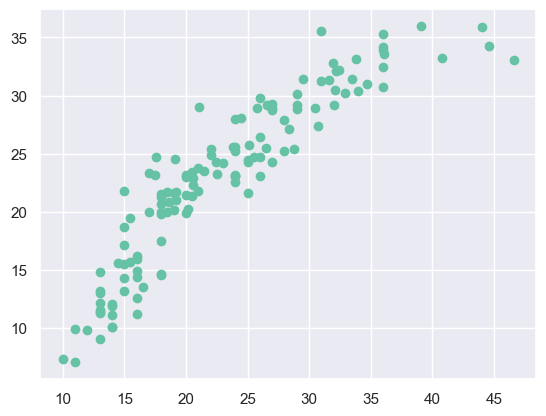

In [104]:
# compare real and predicted y-values (should be linear)
plt.scatter(y_test, y_pred)
plt.show()

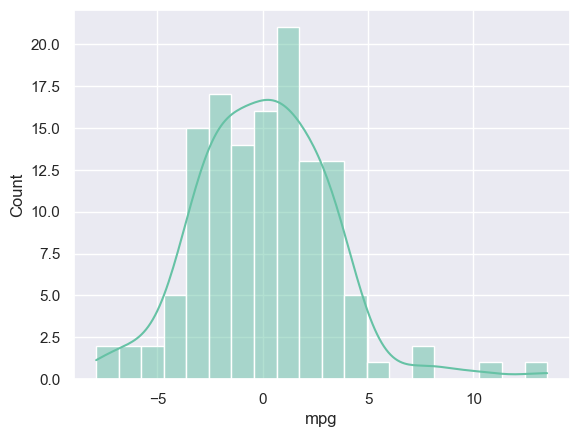

In [105]:
# distribution of residuals (should be normal)
sns.histplot(y_test - y_pred, bins=20, kde=True)
plt.show()

**Comment on the output. For instance:**

i.	Is there a relationship between the predictors and the response? 

ii.	Which predictors appear to have a statistically significant relationship to the response? 

iii.	What does the coefficient for the year variable suggest? Use correct language, for every….

iv.	What does the coefficient for the categorical origin suggest? Use the correct language, comparing each to the Intercept

In [106]:
pd.DataFrame(X_train).info()

<class 'pandas.core.frame.DataFrame'>
Index: 262 entries, 127 to 131
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     262 non-null    int64  
 1   displacement  262 non-null    float64
 2   horsepower    262 non-null    int64  
 3   weight        262 non-null    int64  
 4   acceleration  262 non-null    float64
 5   year          262 non-null    int64  
 6   origin_2      262 non-null    bool   
 7   origin_3      262 non-null    bool   
dtypes: bool(2), float64(2), int64(4)
memory usage: 14.8 KB


In [107]:
coefs_unscaled = lm.params[1:] / scaler.scale_
coefs_unscaled

x1   -0.692509
x2    0.027299
x3   -0.033837
x4   -0.006106
x5    0.109909
x6    0.785615
x7    2.374171
x8    2.485933
dtype: float64

In [108]:
print(f"i. as a whole, the predictors have a moderately strong relationship with the response, as indicated by the R-squared of {lm.rsquared:.3f}")
print(f"ii. stasticially signficant: x2, x4, x6, x7, x8 which correspond to displacement, weight, year, and origin (dummies)")
print(f"iii. for every 1-unit increase in a vehicle's year (x6), we expect a {coefs_unscaled['x6']:.3f} increase in mpg")
print(f"iv. Cars from origin 2 and 3 (x7 and x8) typically have higher mpg than cars from origin 1, by {coefs_unscaled['x7']:.3f} and {coefs_unscaled['x8']:.3f} units respectively.")

i. as a whole, the predictors have a moderately strong relationship with the response, as indicated by the R-squared of 0.814
ii. stasticially signficant: x2, x4, x6, x7, x8 which correspond to displacement, weight, year, and origin (dummies)
iii. for every 1-unit increase in a vehicle's year (x6), we expect a 0.786 increase in mpg
iv. Cars from origin 2 and 3 (x7 and x8) typically have higher mpg than cars from origin 1, by 2.374 and 2.486 units respectively.


**Remove the predictors that aren’t significant, re-calculate the model, and write out the final model equation.**

In [109]:
# drop insiginficant features, redo split (same random state)
X = X.drop(['cylinders', 'horsepower', 'acceleration'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=82)

In [110]:
# scale and add constant
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

In [111]:
X_train.head(3)

,displacement,weight,year,origin_2,origin_3
127,79.0,1950,74,False,True
102,400.0,4997,73,False,False
266,119.0,2300,78,False,True


In [112]:
# define and fit
lm = sm.OLS(y_train, X_train_scaled)
lm = lm.fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     211.3
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           1.11e-88
Time:                        11:44:57   Log-Likelihood:                -694.13
No. Observations:                 262   AIC:                             1400.
Df Residuals:                     256   BIC:                             1422.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.6782      0.214    110.689      0.0

In [113]:
# compare real and predicted values for test set
y_pred = lm.predict(X_test_scaled)

# strength of correlation between real and predicted y
print(f"R-squared: {metrics.r2_score(y_test, y_pred):.3f}")
# avg distance from true y
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred):.3f}")
# avg % distance
print(f"MAPE: {metrics.mean_absolute_percentage_error(y_test, y_pred)*100:.3f}%")
# weighted avg distance (punishing large errors)
print(f"RMSE: {metrics.root_mean_squared_error(y_test, y_pred):.3f}")

R-squared: 0.847
MAE: 2.295
MAPE: 10.548%
RMSE: 3.073


In [114]:
coefs_unscaled = lm.params[1:] / scaler.scale_
coefs_unscaled

x1    0.004892
x2   -0.006378
x3    0.812186
x4    2.108372
x5    1.836287
dtype: float64

In [115]:
print(f"model equation: mpg = {lm.params.iloc[0]:.3f}"
      f" + {coefs_unscaled.iloc[0]:.3f}({X.columns[0]})"
      f" + {coefs_unscaled.iloc[1]:.3f}({X.columns[1]})"
      f" + {coefs_unscaled.iloc[2]:.3f}({X.columns[2]})"
      f" + {coefs_unscaled.iloc[3]:.3f}({X.columns[3]})"
      f" + {coefs_unscaled.iloc[4]:.3f}({X.columns[4]})")

model equation: mpg = 23.678 + 0.005(displacement) + -0.006(weight) + 0.812(year) + 2.108(origin_2) + 1.836(origin_3)


**Fit some models with interactions, like horsepower * weight or displacement/acceleration. Do any interactions appear to be statistically significant?**

In [116]:
# horsepower * weight
X = pd.DataFrame(df['horsepower'] * df['weight'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=82)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
lm = sm.OLS(y_train, X_train)
lm = lm.fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     423.4
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           1.71e-56
Time:                        11:44:57   Log-Likelihood:                -781.64
No. Observations:                 262   AIC:                             1567.
Df Residuals:                     260   BIC:                             1574.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.0248      0.542     60.888      0.0

In [117]:
print(f"statistically significant (p < 0.001) but low r-squared for model fit")

statistically significant (p < 0.001) but low r-squared for model fit


In [118]:
# displacement / accel
X = pd.DataFrame(df['displacement'] / df['acceleration'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=82)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
lm = sm.OLS(y_train, X_train)
lm = lm.fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     296.8
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           6.91e-45
Time:                        11:44:57   Log-Likelihood:                -808.49
No. Observations:                 262   AIC:                             1621.
Df Residuals:                     260   BIC:                             1628.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.5495      0.563     56.067      0.0

In [119]:
print(f"statistically significant (p < 0.001) but low r-squared for model fit")

statistically significant (p < 0.001) but low r-squared for model fit


In [120]:
# whatever this is
X = pd.DataFrame((df['horsepower'] * df['cylinders'] * df['displacement']) / df['weight'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=82)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
lm = sm.OLS(y_train, X_train)
lm = lm.fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     287.2
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           6.68e-44
Time:                        11:44:57   Log-Likelihood:                -810.77
No. Observations:                 262   AIC:                             1626.
Df Residuals:                     260   BIC:                             1633.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.5162      0.478     61.754      0.0

In [121]:
print(f"statistically significant (p < 0.001) but low r-squared for model fit")

statistically significant (p < 0.001) but low r-squared for model fit


**Try a few different transformations of one of the variables, such as 
log(weight), 100/horsepower, cylinders2. Comment on your findings.**

In [122]:
# log(weight)
X = pd.DataFrame(np.log(df['weight']))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=82)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
lm = sm.OLS(y_train, X_train)
lm = lm.fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     567.7
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           2.50e-67
Time:                        11:44:57   Log-Likelihood:                -756.55
No. Observations:                 262   AIC:                             1517.
Df Residuals:                     260   BIC:                             1524.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        205.3613      7.630     26.915      0.0

In [123]:
print(f"statistically significant (p < 0.001) but low r-squared for model fit")
print(f"very similar performance to just using weight, though slightly higher")
print(f"probably a reasonable transformation to apply for sake of normalization")

statistically significant (p < 0.001) but low r-squared for model fit
very similar performance to just using weight, though slightly higher
probably a reasonable transformation to apply for sake of normalization


In [124]:
# horsepower / 100
X = pd.DataFrame(df['horsepower'] / 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=82)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
lm = sm.OLS(y_train, X_train)
lm = lm.fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     414.1
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           1.04e-55
Time:                        11:44:57   Log-Likelihood:                -783.45
No. Observations:                 262   AIC:                             1571.
Df Residuals:                     260   BIC:                             1578.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.3709      0.873     46.246      0.0

In [125]:
print(f"statistically significant (p < 0.001) but low r-squared for model fit")
print(f"same as just using horsepower, but coefficient is scaled by 100")

statistically significant (p < 0.001) but low r-squared for model fit
same as just using horsepower, but coefficient is scaled by 100


In [130]:
# (cylinders)^2
X = pd.DataFrame(df['cylinders'] ** 2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=82)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
lm = sm.OLS(y_train, X_train)
lm = lm.fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     364.4
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           2.22e-51
Time:                        11:45:37   Log-Likelihood:                -793.47
No. Observations:                 262   AIC:                             1591.
Df Residuals:                     260   BIC:                             1598.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.1582      0.585     56.633      0.0

In [ ]:
print(f"statistically significant (p < 0.001) but very low r-squared")
print(f"r-squared is slighlty lower than just evaluating cylinders, probably because of how it exaggerates the range/spread of cylinder count")


statistically significant (p < 0.001) but very low r-squared
r-squared is actually much lower than just evaluating cylinders, probably because of how it exaggerates the range/spread of cylinder count
